# Inspecting GRIB data

When running Metview through its graphical user interface, the easiest way to inspect a GRIB file is to right-click on it and choose 'examine' from the context menu. Similar functionality is available from the command line: "`metview -e /path/to/grib/file`".

This notebook shows how to inspect GRIB data from within a Python environment. Note that filtering, processing and visualising data is covered in other notebooks and gallery examples.

In [1]:
import metview as mv

In [2]:
filename = "data_fc.grib"
if mv.exist(filename):
    fs = mv.read(filename)
else:
    fs = mv.gallery.load_dataset(filename)

## Data overview

In Metview, GRIB data is represented by a **Fieldset** object. Many Metview operations generate GRIB data, we can retrieve it from MARS, or we can load it directly from disk.

GRIB files are composed of messages, one for each field. The [describe()](../api/functions/describe.rst) method groups the GRIB messages by parameter and gives a summary for quick inspection. Here we will see that the Fieldset contains parameters q,t,u,v,z for multiple vertical levels, and tp at surface level at various forecast steps. We will see in a moment what these parameters actually are in case you're not familiar with the letters!

In [3]:
fs.describe()

parameter,typeOfLevel,level,date,time,step,paramId,class,stream,type,experimentVersionNumber
q,isobaricInhPa,"100,250,...",20111215,0,"0,6,...",133,od,oper,fc,0001
t,isobaricInhPa,"100,250,...",20111215,0,"0,6,...",130,od,oper,fc,0001
tp,surface,0,20111215,0,"0,6,...",228,od,oper,fc,0001
u,isobaricInhPa,"100,250,...",20111215,0,"0,6,...",131,od,oper,fc,0001
v,isobaricInhPa,"100,250,...",20111215,0,"0,6,...",132,od,oper,fc,0001
z,isobaricInhPa,"100,250,...",20111215,0,"0,6,...",129,od,oper,fc,0001


We can look a bit deeper into each parameter via its shortName, for example, temperature:

In [4]:
fs.describe(param='t')

shortName,t
paramId,130
typeOfLevel,isobaricInhPa
level,"100,250,300,500,700,850,1000"
date,20111215
time,0
step,"0,6,12,18,24,30,36,42"
class,od
stream,oper
type,fc
experimentVersionNumber,0001


Note that the data do not necessarily form a complete hypercube - this summary lists all the values for each 'dimension', but it is not necessarily the case that, for example, all the steps exist for all the levels. 

We can also specify the parameter via its numeric paramId, for example, total precipitation:

In [5]:
fs.describe(param=228)

shortName,tp
paramId,228
typeOfLevel,surface
level,0
date,20111215
time,0
step,"0,6,12,18,24,30,36,42"
class,od
stream,oper
type,fc
experimentVersionNumber,0001


## Data table

`fs` is a Fieldset object representing the GRIB file. It is essentially a list of GRIB messages.
The [ls()](../api/functions/ls.rst) method displays information on a per-message basis. We can call it with the whole Fieldset, but that gives us a very long listing! So let's call it on the first 10 fields using Python's 'slice' operator:

In [6]:
fs[:10].ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,t,isobaricInhPa,1000,20111215,0,0,fc,regular_ll
1,ecmf,z,isobaricInhPa,1000,20111215,0,0,fc,regular_ll
2,ecmf,u,isobaricInhPa,1000,20111215,0,0,fc,regular_ll
3,ecmf,v,isobaricInhPa,1000,20111215,0,0,fc,regular_ll
4,ecmf,q,isobaricInhPa,1000,20111215,0,0,fc,regular_ll
5,ecmf,t,isobaricInhPa,850,20111215,0,0,fc,regular_ll
6,ecmf,z,isobaricInhPa,850,20111215,0,0,fc,regular_ll
7,ecmf,u,isobaricInhPa,850,20111215,0,0,fc,regular_ll
8,ecmf,v,isobaricInhPa,850,20111215,0,0,fc,regular_ll


We can select a different range of fields and add extra ecCodes keys to get more information:

In [7]:
fs[210:220].ls(extra_keys=['name', 'units'])

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType,name,units
Message,,,,,,,,,,,
0,ecmf,t,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,Temperature,K
1,ecmf,z,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,Geopotential,m**2 s**-2
2,ecmf,u,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,U component of wind,m s**-1
3,ecmf,v,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,V component of wind,m s**-1
4,ecmf,q,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,Specific humidity,kg kg**-1
5,ecmf,t,isobaricInhPa,850,20111215,0,36,fc,regular_ll,Temperature,K
6,ecmf,z,isobaricInhPa,850,20111215,0,36,fc,regular_ll,Geopotential,m**2 s**-2
7,ecmf,u,isobaricInhPa,850,20111215,0,36,fc,regular_ll,U component of wind,m s**-1
8,ecmf,v,isobaricInhPa,850,20111215,0,36,fc,regular_ll,V component of wind,m s**-1


We can add some keys that compute statistics per field (this will take longer, as the values will be decoded and the statistics computed - they are not stored in the GRIB header).

In [8]:
fs[210:220].ls(extra_keys=['min', 'max'])

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType,min,max
Message,,,,,,,,,,,
0,ecmf,t,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,250.973,312.973
1,ecmf,z,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,-2506.38,3061.62
2,ecmf,u,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,-14.0416,19.7084
3,ecmf,v,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,-16.6044,19.3956
4,ecmf,q,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,8.95455e-05,0.0198649
5,ecmf,t,isobaricInhPa,850,20111215,0,36,fc,regular_ll,245.139,302.639
6,ecmf,z,isobaricInhPa,850,20111215,0,36,fc,regular_ll,10344.5,16136.5
7,ecmf,u,isobaricInhPa,850,20111215,0,36,fc,regular_ll,-16.2513,26.9987
8,ecmf,v,isobaricInhPa,850,20111215,0,36,fc,regular_ll,-21.4716,25.5284


We can also use type qualifiers (s=string, l=long, d=double) to give more control over how the keys are displayed:

In [10]:
fs[210:220].ls(extra_keys=['centre:l'])

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType,centre:l
Message,,,,,,,,,,
0,ecmf,t,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,98.0
1,ecmf,z,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,98.0
2,ecmf,u,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,98.0
3,ecmf,v,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,98.0
4,ecmf,q,isobaricInhPa,1000,20111215,0,36,fc,regular_ll,98.0
5,ecmf,t,isobaricInhPa,850,20111215,0,36,fc,regular_ll,98.0
6,ecmf,z,isobaricInhPa,850,20111215,0,36,fc,regular_ll,98.0
7,ecmf,u,isobaricInhPa,850,20111215,0,36,fc,regular_ll,98.0
8,ecmf,v,isobaricInhPa,850,20111215,0,36,fc,regular_ll,98.0


We can add a filter to show only those messages whose keys match all the given conditions. Note that these must be valid ecCodes keys - 'shortName' or 'paramId' can be used for the parameter, but 'param' cannot, since it is not a key. Keys do not need to be displayed in order to be used as a filter.

In [27]:
fs.ls(filter={'shortName':'t', 'step':6, 'centre:s':'ecmf'})

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
35,ecmf,t,isobaricInhPa,1000,20111215,0,6,fc,regular_ll
40,ecmf,t,isobaricInhPa,850,20111215,0,6,fc,regular_ll
45,ecmf,t,isobaricInhPa,700,20111215,0,6,fc,regular_ll
50,ecmf,t,isobaricInhPa,500,20111215,0,6,fc,regular_ll
55,ecmf,t,isobaricInhPa,300,20111215,0,6,fc,regular_ll
60,ecmf,t,isobaricInhPa,250,20111215,0,6,fc,regular_ll
65,ecmf,t,isobaricInhPa,100,20111215,0,6,fc,regular_ll


Note that the output from [ls()](../api/functions/ls.rst) is a pandas dataframe, allowing further manipulation:

In [12]:
p = fs[:10].ls()
print(type(p))
print(p.columns)
print(p['shortName'])

<class 'pandas.core.frame.DataFrame'>
Index(['centre', 'shortName', 'typeOfLevel', 'level', 'dataDate', 'dataTime',
       'stepRange', 'dataType', 'gridType'],
      dtype='object')
Message
0    t
1    z
2    u
3    v
4    q
5    t
6    z
7    u
8    v
9    q
Name: shortName, dtype: object


## Getting more specific keys

To extract just the keys you want from the GRIB fields, use [grib_get_long()](../api/functions/grib_get.rst#grib_get_long), [grib_get_double()](../api/functions/grib_get.rst#grib_get_double) and [grib_get_string()](../api/functions/grib_get.rst#grib_get_string) to extract single keys, and [grib_get()](../api/functions/grib_get.rst) for multiple keys. These examples show how.

In [13]:
fs[:5].grib_get_string('centre')

['ecmf', 'ecmf', 'ecmf', 'ecmf', 'ecmf']

In [15]:
fs[:5].grib_get_long('centre')

[98.0, 98.0, 98.0, 98.0, 98.0]

In [20]:
fs[43:48].grib_get_double('level')

[850.0, 850.0, 700.0, 700.0, 700.0]

When extracting mutliple keys, it is more efficient to use [grib_get()](../api/functions/grib_get.rst) to get them all in one go:

In [23]:
fs[43:48].grib_get(['centre', 'step', 'level'])

[['ecmf', '6', '850'],
 ['ecmf', '6', '850'],
 ['ecmf', '6', '700'],
 ['ecmf', '6', '700'],
 ['ecmf', '6', '700']]

Since the [grib_get()](../api/functions/grib_get.rst) method does not specify a type for each key, we can add `:l`, `:d` or `:s` to each one:

In [25]:
fs[43:48].grib_get(['centre:l', 'step', 'level'])

[[98.0, '6', '850'],
 [98.0, '6', '850'],
 [98.0, '6', '700'],
 [98.0, '6', '700'],
 [98.0, '6', '700']]

The above command will return a list per field. We can instead tell it to group the results by key:

In [26]:
fs[43:48].grib_get(['centre:l', 'step', 'level'], 'key')

[[98.0, 98.0, 98.0, 98.0, 98.0],
 ['6', '6', '6', '6', '6'],
 ['850', '850', '700', '700', '700']]

## Quick plot
Let's plot the first field to see the geographic extents of the data:

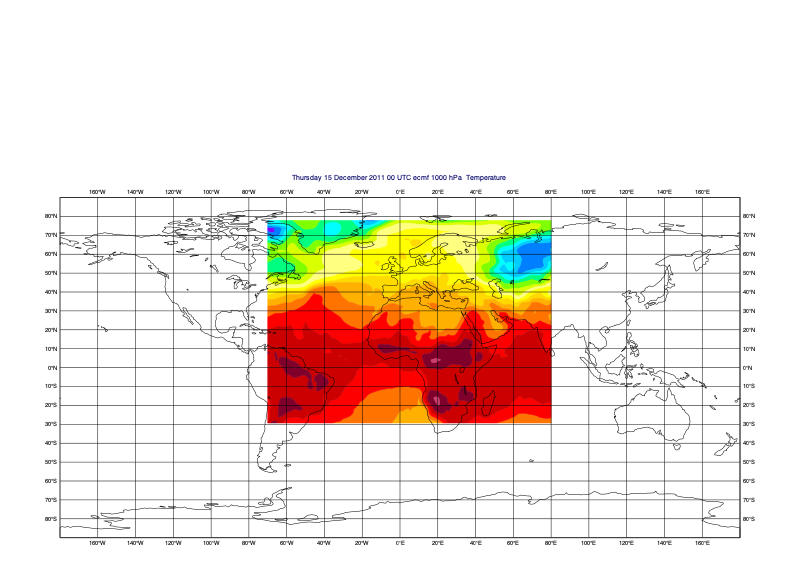

In [34]:
mv.setoutput('jupyter')
mv.plot(fs[0], mv.mcont(contour_automatic_setting='ecmwf'))